# Analisis exploratorio de datos:

##### Autor: Diego Iván Gamarra Medina

En este proyecto, realizaremos un analisis exploratorio de datos al dataset "Sales Data". Este conjunto de datos contiene información de ventas de productos en los estados unidos. Tenemos como objetivo entender el conjunto de datos, identificar patrones, relaciones y sacar insights accionables 

### Dataset: 
Nuestro set de datos contiene las siguientes variables: 
- nnamed : 0	= Indice de cada registro
- Order ID = Id único de cada orden de producto
- Product = Nombre del producto comprado
- Quantity Ordered = Cantidad del producto comprado
- Price Each = Precio unitario
- Order Date = Fecha del pedido
- Purchase Address = Direccion de la compra
- Month	= Mes de la compra
- Sales = Total de la compra
- City = ciudad de la compra
- Hour = Hora de la compra


### Objetivos:

##### `Pregunta principal` 
- ¿Cuales son los factores que influyen en el comportamiento de las ventas y cómo podemos utilizarlos para optimizar las decisiones? **Falta responder**

##### `Preguntas secundarias:`
- ¿Existe estacionalidad en las ventas?
- ¿Cuales son los productos más vendidos y cuales tienen bajo rendimiento?
- ¿En qué ciudades o estados hay más ventas o en cuales no hay rendimiento?
- ¿Los clientes tienen patrones de compras? **falta responder**
- ¿Se pueden predecir las ventas futuras? ¿Qué factores influyen en las ventas? **Falta responder**


#### Importaciones necesarias:

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


#### Cargamos los datos


In [111]:
df = pd.read_csv("data/Sales Data.csv")

df_copy = df.copy() #Resplado del dataframe original

#### Vistazo general al dataframe

In [112]:
display(df.head())

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [113]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


None

In [114]:
display(df.describe())

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


- Podemois ver claramente que no poseemos datos nulos, esto nos ahorrará bastante tiempo, no será necesario imputar valores nulos.
- Se destaca una desviacion estandar bastante alta en los precios unitarios y totales, esto nos dice que dichos datos estarán bastante dispersos 
- La media y mediana de los precios unitarios y totales son muy diferentes, esto nos indica una distribucion no simétrica y posiblemente sesgada positivamente
- Tambien se observa que la columna de fecha está en formato object, debemos tratarlo y convertirlo a un tipo adecuado
- Se observa una columna llamada unnamed:0, corresponde a un id. Esa columna la eliminaremos ya que ya contamos con un índice que nos proporciona pandas y coincide de la misma manera


## Limpieza de datos

### Imputación de columnas

In [115]:
df.drop(columns=["Unnamed: 0"], inplace=True) #Eliminamos la columna Unnamed: 0 porque es un id innecesario

df.rename(columns={"Sales": 'Total'}, inplace=True) #Renombramos la columna Sales a Total, lo considero  más descripitivo

#### Corrección de tipos de datos

In [116]:
df["Order Date"] = pd.to_datetime(df["Order Date"]) #Convertimos la columna Order Date a datetime

In [117]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [118]:
df.info()   #Vemos que se realizó exitosamente la conversión

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Total             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


### Creación de nuevas variables para más posibilidad de analisis

In [119]:

#Acá creamos una nueva columna state, con los estados correspondientes a la direccion de compra

# La expresión regular busca caracteres que no sean dígtos despues de la ultima coma. 
# La primera expresion es una negacion, busca uno o más caracteres que no sean comas
# La segunda expresion es una busqueda anticipada, verifica que coincida con la expresión pero no lo captura
# En esa expresion debe haber uno o más espacios en blanco, puede que no haya números, si hay puede haber uno o más
# Y si hay digitos, asegura que esten al final de la cadena despues de los espacios

df['State'] = df["Purchase Address"].apply(lambda x: re.search(r"[^,]+(?=\s+\d*$)", x).group(0) if re.search(r"[^,]+(?=\s+\d*$)", x) else None)

# en el apply se itera la columna con un lambda que retorna la expresion regular si hay coincidencias, si no, returna none


In [120]:
def asignar_estacion(fecha):
    """
    Esta funcion recibe como parámetro una fecha del df, asigna la fecha y el día a dos variables y luego,
    mediante validaciones, verifica en qué rango de fechas está para determinar la estacion del año de estados unidos
    """
    mes = fecha.month
    dia = fecha.day
    
    if(mes == 3 and dia >= 20) or (mes in [4, 5]) or (mes == 6 and dia < 21): #Primavera: Del 20 de marzo al 21 de junio
        return "Spring"
    elif(mes == 6 and dia >= 21) or (mes in [7, 8]) or (mes == 9 and dia < 22): #Verano: Del 21 de junio al 22 de septiembre
        return "Summer"
    elif(mes == 9 and dia >= 22) or (mes in [10, 11]) or (mes == 12 and dia < 21): # Otoño: Del 22 de septiembre al 21 de dicembre
        return "Fall"
    else:                                                                             #Invierno: Del 21 de diciembre al 20 de marzo
        return "Winter"
        
df["Season"] = df["Order Date"].apply(lambda x: asignar_estacion(x)) #acá se aplica la funcion creada, mediante el método apply y una funcion lambda para iterar por cada elemento de la columna fecha

In [121]:
df["Day"] = df["Order Date"].dt.dayofweek   #asigna un dia de la semana, empieza con 0 (lunes)

#### Vemos las nuevas columnas creadas:

In [122]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,NY,Winter,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,NY,Winter,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,NY,Fall,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,CA,Winter,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,GA,Fall,2


### Resumen de analisis estadistico:

In [123]:
# Vemos un resumen estadístico del dataframe
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Total,Hour,Day
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,2.991482
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,0.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,1.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,3.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,5.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,6.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,2.001968


- No nos da tanta información, lo más importante es que las columnas de precio unitario y total tienen una desviación estandar extremadamente alta, esto nos indica una dispersión de los datos y con total seguridad, outliers. A continuación, veremos estos outliers y tomaremos una decisión.

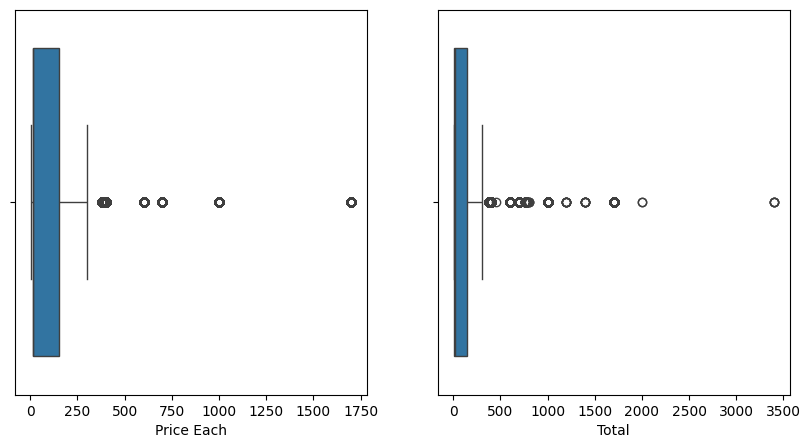

In [124]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(
    data = df,
    x = "Price Each"
)

plt.subplot(1,2,2)
sns.boxplot(
    data = df,
    x = "Total"
)
plt.show()


- Efectivamente, observamos la presencia de outliers, no los considero valores extremos ni tampoco erroneos, solamente hay demasiadas ventas y productos de un precio bajo y pocas de productos muy altos, los cuales crean el sesgo. No considero que debamos eliminar los datos ya que no son erroneos, solamente tendremos en cuenta los valores atípicos para los gráficos y analisis.

### Analisis univariado (Categoricos)

- Usaremos gráficos como histogramas para todas las variables de nuestro dataset
- Variables a utilizar: Product, Month, City, State, Season

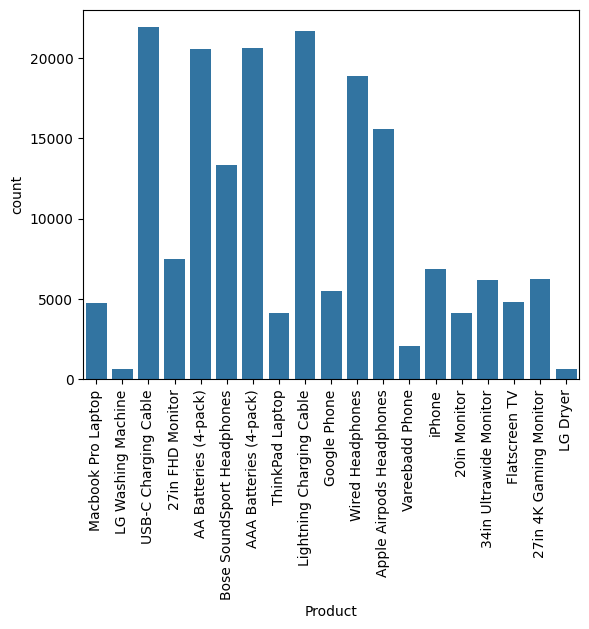

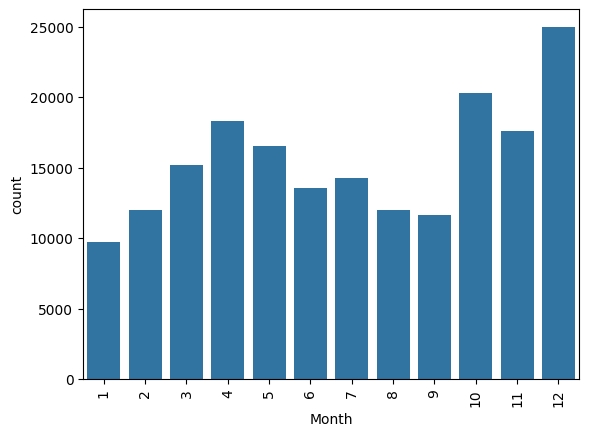

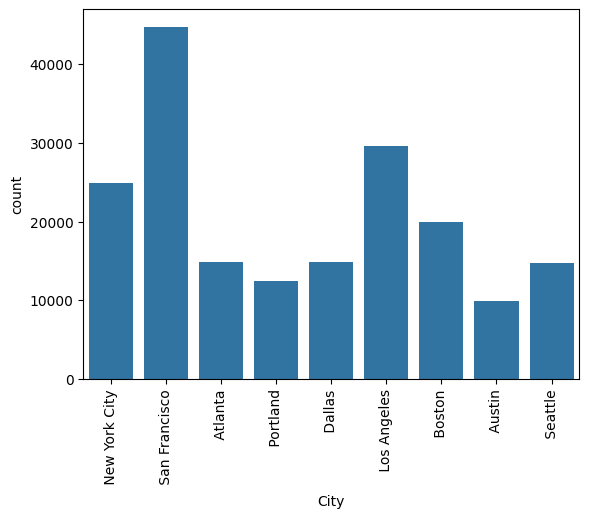

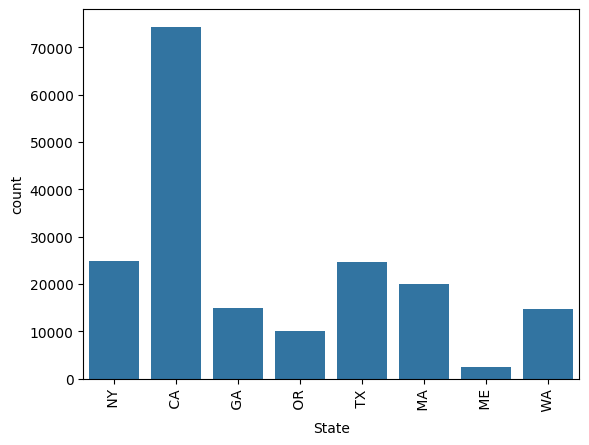

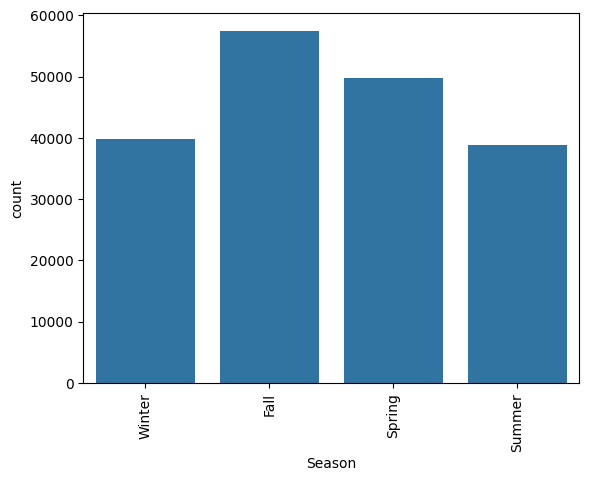

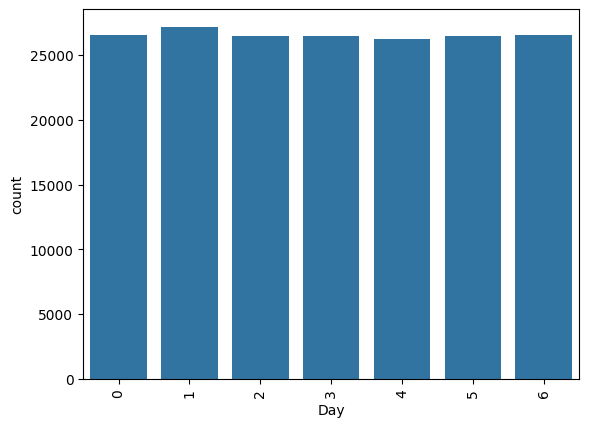

In [125]:
lista_categoricos = ["Product", "Month", "City", "State", "Season", "Day"] 

for column in lista_categoricos:
    
    sns.countplot(
    data= df,
    x = column
    )
    plt.xticks(rotation=90)
    plt.show()

#### Product:
    - Vemos una gran variedad de productos. Los productos con más ventas son usb c charging cable, charging lightning cable, AA Batteries (4-pack) y AAA Batteries (4-pack). Son productos de alta rotación y se necesitan en cualquier momento. Los clientes no pensarán ni sentiran que hastan gastando ya que son productos normalmente baratos e indispensables.
    - Los productos más vendidos son usb c charging cable y lightning charging cable  
#### Month
    - El mes con más ventas corresponde a diciembre, se ve un poco de estacionalidad en ciertos meses clave, como por ejemplo,en diciembre navidad, en noviembre black friday, en abril vacaciones de primavera, etc.
#### City
    - Las 3 ciudades principales cuentan con la mayor cantidad de ventas, New York, San francisco y Los Ángeles. Esto debido principalmente a su poblacion, cantidad de turismo y mayor presencia en el mercado, siendo de las principales ciudades turisticas del país
#### State
    - Vemos que hay un pico enorme de ventas en california, corresponde a la mayor cantidad de ventas, era de esperarse debido a que california es el estado más poblado de los estados unidos. En el gráfico le sigue new york y texas, cuyos estados también son de los más poblados de estados unidos
#### Season
    - La temporada con más ventas sería otoño, esto debido a la entrada y preparación de los meses festivos. Esto reespalda lo dicho anteriormente con respecto a los meses, ya que en invierno, finalizando las fechas festivas, hay un decremento importante en las ventas
#### Day
    - Se ve un gráfico bastante plano, prácticamente en todos los días de la semana hay casi la misma cantidad de ventas, esto podría deberse a que las personas podrían querer o necesitar cualquier producto en cualquier momento, no es como un bar, que normalmente los fines de semana tienen altas ventas, es una tienda de tecnologia.

### Analisis univariado (Numéricos):
- Usaremos Histogramas y gráficos de violin para evitar ver los outliers de una manera invasiva, como lo hace boxplot.
- Variables a utilizar: Price Each, Total, Quantity Ordered, Hour

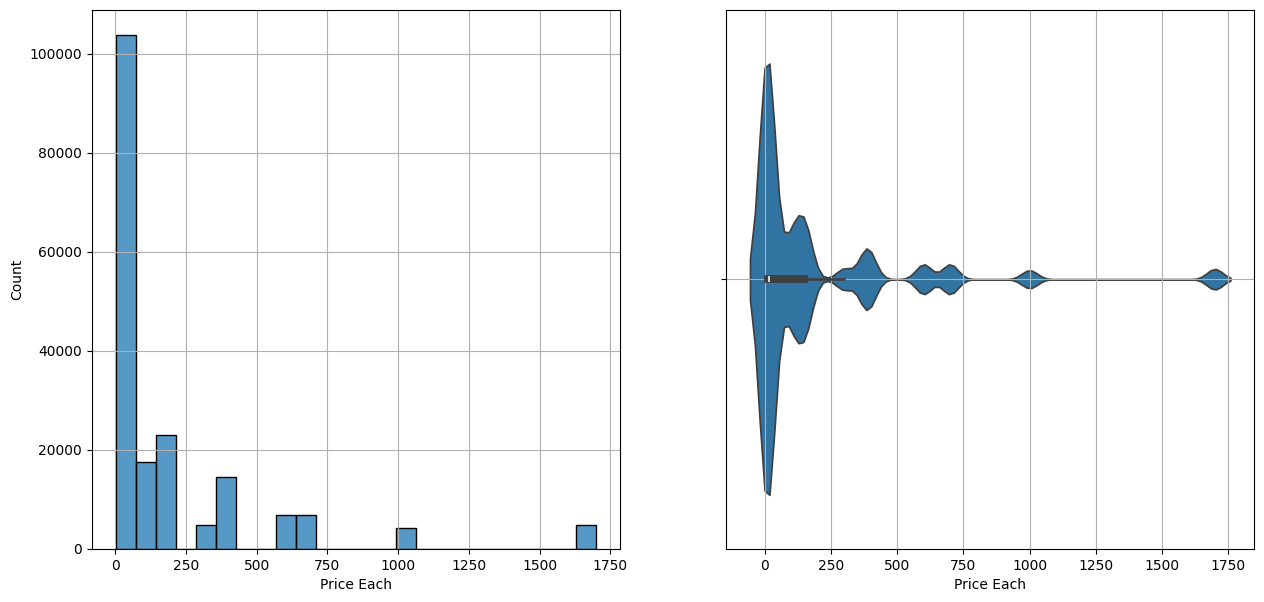

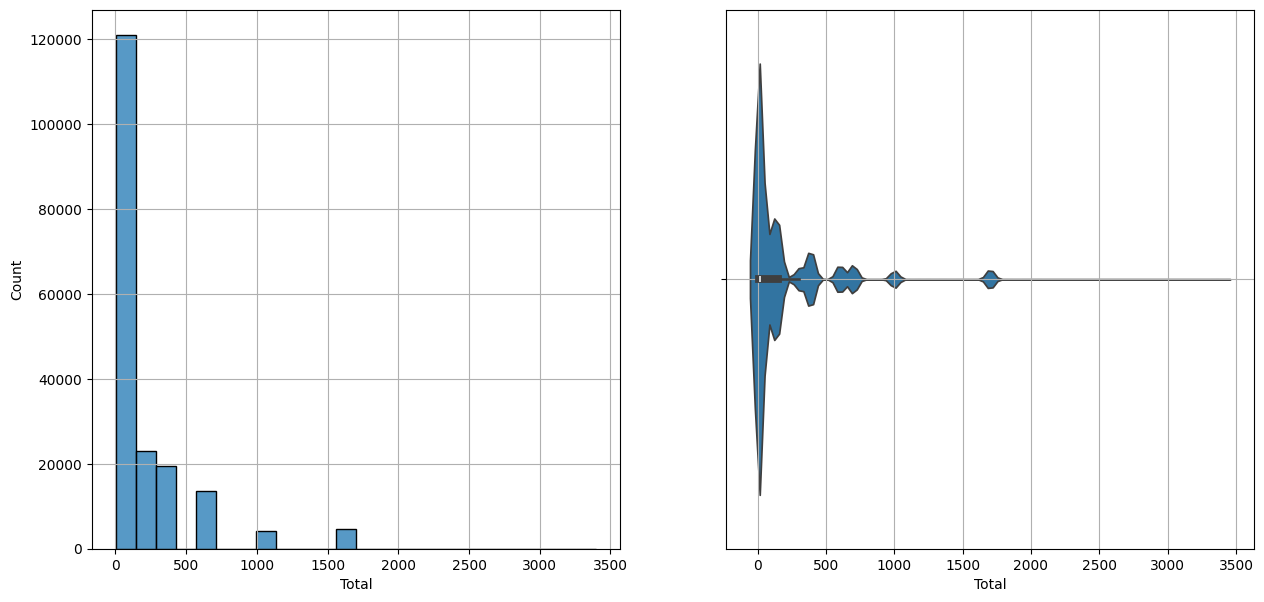

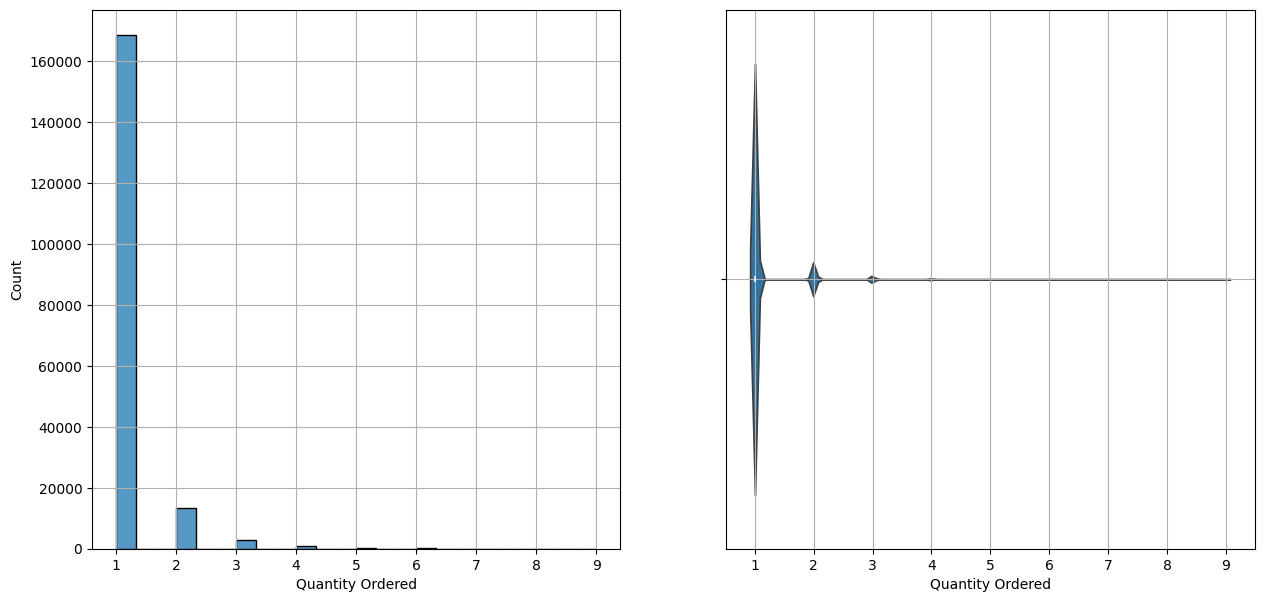

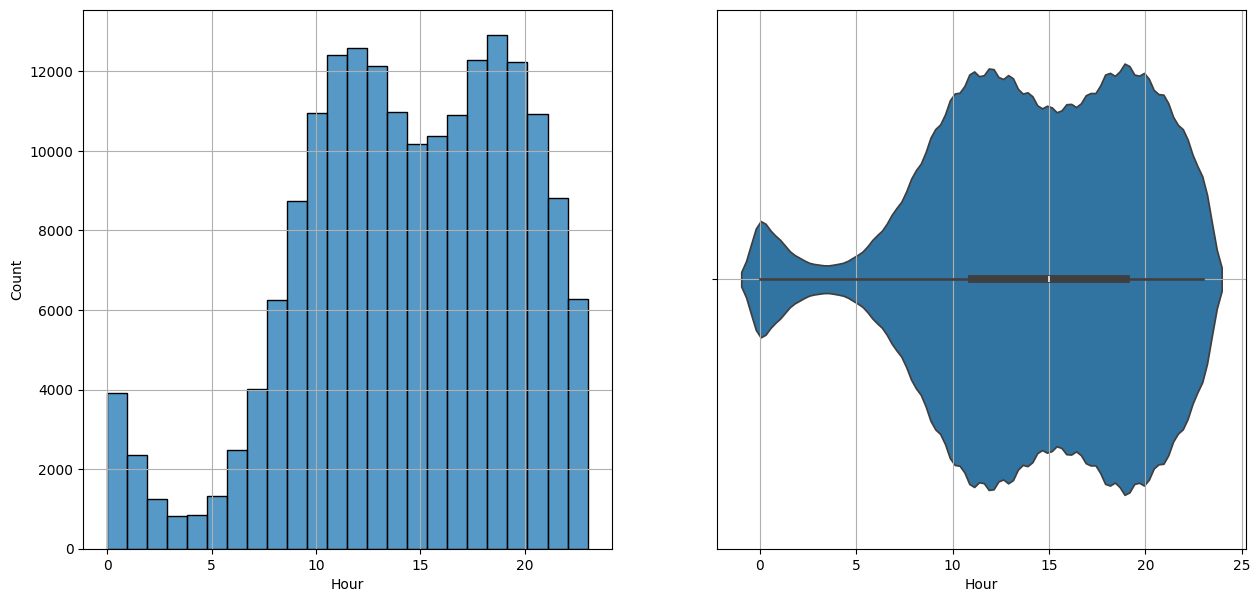

In [126]:
lista_numericos = ["Price Each", "Total", "Quantity Ordered", "Hour"]

for column in lista_numericos:
    plt.figure(figsize=(15, 7))
    plt.subplot(1,2,1)
    sns.histplot(
        data= df,
        x = column,
        #kde= True,
        bins = 24
        
    )
    plt.grid()
    
    plt.subplot(1,2,2)  #uso de violinplot para ver la distribución sin resaltar outliers 
    sns.violinplot(
        data= df,
        x = column,
        
    )
    plt.grid()
    plt.show()

#### Price Each:
    - El 50% de los precios están en un rango de 1 a 180 dolares
    - En esa columna, observamos un sesgo gigantesco, debido a los distintos precios, mayor cantidad de productos baratos, pero los productos caros crean este sesgo. Esto es porque hay productos desde pilas que rondarian de 2 a 3 dolares por ejemplo, hasta computadoras que pueden rondar de 1.000 a 3.000 dolares. Tenemos un rango de 1700 dolares aproximadamente
    - Se observa un pico gigantesco en los productos baratos, la alta rotacion y precios de dichos productos ocasionan eso.
    - Se observan unos pocos outliers en los precios unitarios, debido a los productos más caros como computadoras o telefonos de alta gama, no los considero incorrectos porque son los precios que le corresponden a cada producto, si cambiaramos los precios estariamos metiendo datos incorrectos al dataset, solo habrá que tener en cuenta el sesgo para el analisis. Reitero, no son errores ni datos extremos, solamente son menos frecuentes
#### Total:
    - De manera muy similar a los precios unitarios, el 50% de los precios están en un rango aproximado de 1 a 180 dolares, esto debido a que los productos de más rotación y menor precio son los más adquiridos. Y como veremos en la siguiente variable, influye mucho la cantidad de productos comprados por orden de compra
    - En esta columna, observamos una distribución bastante similar a la anterior, un sesgo muy importante debido al rango de precios, aumenta un poco más el rango de dinero ya que se le suma otro factor, la cantidad de productos que se puede ordenar. Se sigue observando un gran pico en los totales más baratos y una larga cola a la derecha, sesgo positivo, por los totales más caros
    - Tambien se observan outliers, en esta columna han aumentado, de igual manera siguen siendo pocos y no los considero incorrectos ya que corresponden a los productos más costosos. Reitero, no son errores ni datos extremos, solamente son menos frecuentes
#### Quantity Ordered
    - En esta columna el sesgo es abismal, diría que el 90% de las compras son de una unidad, un 5% de 2 unidades y el resto se distribuye en el resto de cantidades. Las demás cantidades aparecen como outliers pero en realidad no lo son. No son errores ni datos extremos, solamente son menos frecuentes. Esto tambien nos da a entender que se trata de un negocio minorista, no hay compras con altas cantidades de productos
#### Hour
    - En ambos gráficos se observan dos picos o grupos que destacan. Se ven gran cantidad de compras de 10 a 15 y de 15 a 20hs, lo que podría coincidir con horarios de almuerzo y horarios de salida del trabajo. Hay un pequeño pico al rededor de las 00hs, indica compras nocturnas. Debido al horarío de compras, podría tratarse de un e-commerce o de una tienda 24hs. Lo más lógico sería un e-commerce, casi no existen tiendas de articulos electronicos o informáticos que sean 24hs. Esto nos ayuda a entender el gráfico de compras por día que vimos anteriormente, un e-commerce facilita e incentiva la compra en cualquier día de la semana, por eso el gráfico de días se veía plano, con misma cantidad de ventas independientemente del día. En este caso, podría considerarse reforzar los servidores o personal en estos horarios picos. Podrían realizarse promociones en horas de baja demanda para incentivar la compra. 


### Analisis Multivariado
- Analizaremos las combinaciones de variables más importantes en busca de tendencias

In [127]:
# Vemos la cantidad de ventas por año
df["Order Date"].dt.year.value_counts()

Order Date
2019    185916
2020        34
Name: count, dtype: int64

-Ya que solamente 34 ventas pertenecen al 2020, solo graficaremos los datos historicos de 2019

In [128]:

df_filtrado = df.query("`Order Date`.dt.year == 2019") #Filtramos el dataframe para que solo contenga datos del año 2019

df_filtrado.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,NY,Winter,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,NY,Winter,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,NY,Fall,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,CA,Winter,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,GA,Fall,2


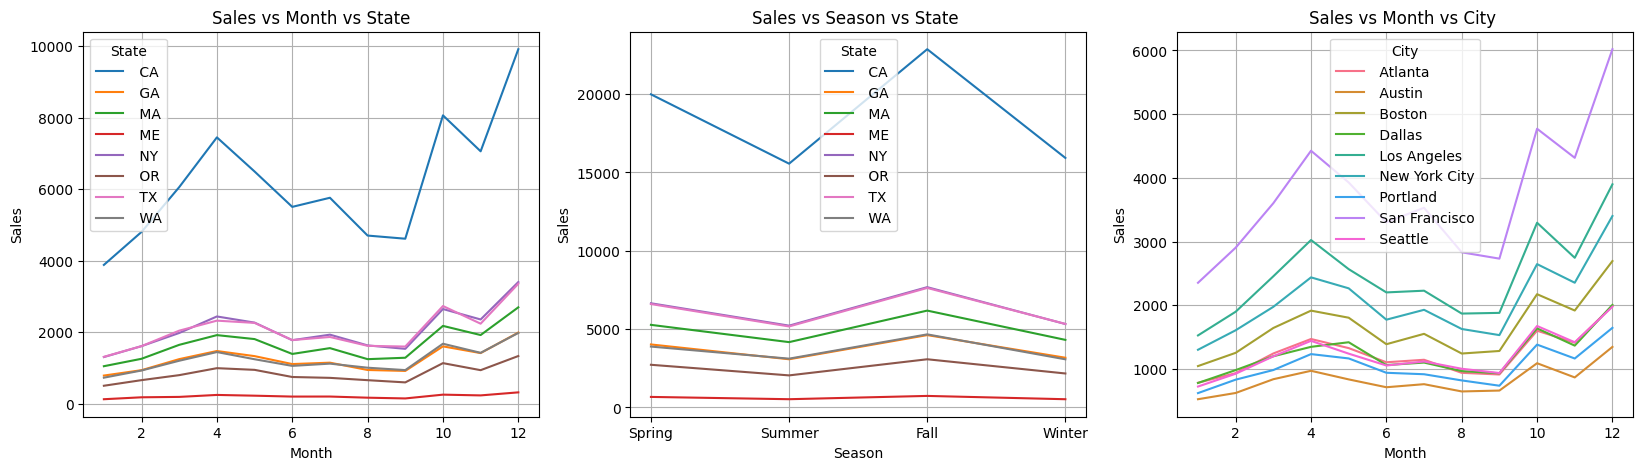

In [129]:
ventas_por_mes_por_estado = df_filtrado.groupby(["Month", "State"]).size().reset_index(name="Sales") # df agrupado por mes y estado
ventas_por_estacion_por_temporada = df_filtrado.groupby(["Season", "State"]).size().reset_index(name="Sales") # df agrupado por estación y estado
ventas_por_mes_por_ciudad = df_filtrado.groupby(["Month", "City"]).size().reset_index(name="Sales") # df agrupado por mes y ciudad

# Definir el orden deseado
orden_personalizado = ["Spring", "Summer", "Fall", "Winter"]

# Convertir la columna a categoría ordenada
ventas_por_estacion_por_temporada["Season"] = pd.Categorical(ventas_por_estacion_por_temporada["Season"], categories=orden_personalizado, ordered=True) # acá ordenamos las estaciones para tener un mejor gráfico

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.lineplot(
    data=ventas_por_mes_por_estado,
    x = "Month",
    y = "Sales",
    hue= "State",
    # palette="husl"
)
plt.title("Sales vs Month vs State")
plt.grid()

plt.subplot(1,3,2)
sns.lineplot(
    data=ventas_por_estacion_por_temporada,
    x = "Season",
    y = "Sales",
    hue= "State",
    # palette="husl"
)
plt.title("Sales vs Season vs State ")
plt.grid()

plt.subplot(1,3,3)
sns.lineplot(
    data=ventas_por_mes_por_ciudad,
    x = "Month",
    y = "Sales",
    hue= "City",
    palette="husl"
)
plt.title("Sales vs Month vs City ")
plt.grid()
plt.show()

- En el gráfico izquierdo obsevamos la cantidad de ventas por los meses del año y por estados, vemos claramente que las ventas suben drásticamente a finales de año, por las fechas festivas. Se observa otro pico en unos meses previos como octubre, se debe a la anticipacion de las fiestas, así tambien como black friday, que es en noviembre. El pico que se encuentra en abril podría deberse a las vacaciones de primavera de los estudiantes, en fechas de pascua y semana santa, y esto resulta en más ventas. Luego se observa una gran caída en las ventas hasta septiembre debido a los gastos previos y futuros para las fiestas. Esta caida es bastante interesante, ya que coincide con las vacaciones de verano, intuyo que debido a los futuros gastos que se aproximan, como los gastos para la vuelta a clases y los gastos de las fiestas, las ventas bajan drásticamente en este lapso de tiempo.

- En el gráfico del medio observamos la cantidad de ventas por estaciones del año y por estados. Vemos que otoño es el mes con mayor cantidad de ventas, estación previa y entrante a invierno, fechas festivas. Vemos el gran descenso al entrar invierno y pasar las fiestas. Luego comienza a subir en primavera, las vacaciones de pascua y semana santa. En verano observamos la caida drástica de las ventas. Este gráfico es basicamente un reflejo de manera más resumida que el gráfico anterior. Se podría aumentar el stock en las fechas con más compras de todo el año, para las fechas con caida de ventas, planificar estrategias de publicidad, promociones, etc. En un intento de aumentar las ventas.

- Obs: en ambos gráficos se observa que el estado de Maine (Me) se mantiene con ventas muy bajas, pero de igual manera se nota que sigue la tendencia estacionaria, de una manera mucho más sutil, poco perceptible. 

- En el gráfico de la derecha observamos la cantidad de ventas por meses y por ciudades. En todas las ciudades se sigue observando el mismo patrón estacional. Curiosamente, San Francisco es la ciudad con mayor cantidad de ventas, siendo esta poco poblada en comparación a Los angeles y Nueva York, que son las ciudades que le siguen en el gráfico.

- En general, se observa el mismo patron de estacionalidad en todos los gráficos, en algunos más pronunciados que otros, pero todos siguen el mismo patrón.

### Gráfico de pareto de ventas por ciudad:

In [130]:
ventas_ciudad = df.groupby(["City"]).size().reset_index(name="Sales")   # creamos un nuevo dataframe agrupado por ciudad, muestra cantidad de ventas
ventas_ciudad = ventas_ciudad.sort_values("Sales", ascending=False) # ordenamos de manera descendente 

ventas_ciudad["Ventas_acumuladas"] = ventas_ciudad["Sales"].cumsum() # suma acumulada de cantidad de ventas, ventas acumuladas

ventas_ciudad["Porcentaje_ventas"] = ventas_ciudad["Sales"] / ventas_ciudad["Sales"].sum() # porcentaje de ventas 

ventas_ciudad["Porcentaje_ventas_acumuladas"] = (ventas_ciudad["Ventas_acumuladas"] / ventas_ciudad["Sales"].sum() ) * 100 # porcentaje de ventas acumuladas

ventas_ciudad.head()  #vemos el dataframe

,City,Sales,Ventas_acumuladas,Porcentaje_ventas,Porcentaje_ventas_acumuladas
7,San Francisco,44732,44732,0.240559,24.055929
4,Los Angeles,29605,74337,0.159209,39.976876
5,New York City,24876,99213,0.133778,53.354665
2,Boston,19934,119147,0.107201,64.074751
0,Atlanta,14881,134028,0.080027,72.077440


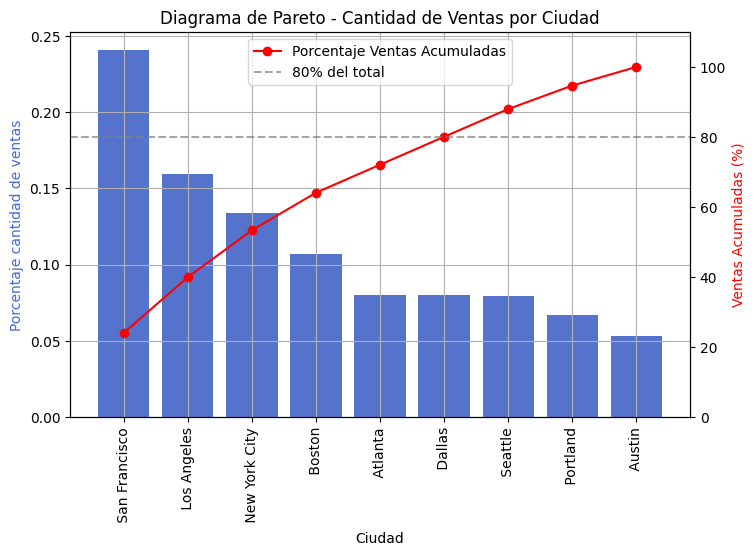

In [131]:
fig, ax1 = plt.subplots(figsize=(8,5)) # se crea una figura y el eje principal

sns.barplot(
    data= ventas_ciudad,
    x = "City",
    y = "Porcentaje_ventas",
    color="royalblue",
    ax = ax1        # el gráfico de barras corresponde al eje principal ax1
)
plt.xticks(rotation=90)
plt.grid()

ax2 = ax1.twinx()   # esto crea un segundo eje y llamado ax2 en el mismo gráfico, permite superponer dos gráficos 
                    # ax1 es para el gráfico de barras y ax2 es para el gráfico de linea
ax2.plot(
    ventas_ciudad["City"],  # eje x 
    ventas_ciudad["Porcentaje_ventas_acumuladas"], # eje y 
    color = "red",     # color de la linea
    marker= "o",        # cada punto se marca con un circulo
    linestyle = "-",    # linea continua 
    label = "Porcentaje Ventas Acumuladas"
)

# Etiquetas que corresponden a cada eje 
ax1.set_ylabel("Porcentaje cantidad de ventas", color="royalblue")
ax2.set_ylabel("Ventas Acumuladas (%)", color="red")
ax1.set_xlabel("Ciudad")
ax2.set_ylim(0, 110)    #ajusta el rango del eje y derecho, de 0 a 110 para que se vea mejor el ultimo valor del eje y 
ax1.set_title("Diagrama de Pareto - Cantidad de Ventas por Ciudad")
ax2.axhline(80, color="gray", linestyle="dashed", alpha=0.7, label="80% del total") # acá agregamos la linea que marca el 80% de acumulación 
ax2.legend(loc="upper center") #ubicacion de la leyenda 

plt.show()

- Se observa en en gráfico de pareto, que el 80% de las ventas corresponden a san francisco, los angeles, new york city, boston, atlanta y dallas. Considerar priorizar recursos en estas ciudades, estrategias como mejor distribución de los puntos de ventas, más publicidad y promociones pueden maximizar los ingresos y optimizar las inversiones.  
- El otro 20% de las ventas corresponden a seattle, portland y austin. Sería bueno reevaluar la rentabilidad en las ciudades con bajas ventas. Analizar si en estas ciudades el problema es la demanda, la falta de disponibilidad productos u otras razonas. Investigar formas de hacer crecer las ventas en estas ciudades en el caso de que igual siga siendo rentable, estrategias de publicidad, marketing, promociones, o hacer un nuevo estudio de mercado

### Gráfico de pareto de ventas por estado:

In [132]:
ventas_estado = df.groupby(["State"]).size().reset_index(name="Sales")   # creamos un nuevo dataframe agrupado por estado, muestra cantidad de ventas
ventas_estado = ventas_estado.sort_values("Sales", ascending=False) # ordenamos de manera descendente 

ventas_estado["Ventas_acumuladas"] = ventas_estado["Sales"].cumsum() # suma acumulada de cantidad de ventas, ventas acumuladas

ventas_estado["Porcentaje_ventas"] = ventas_estado["Sales"] / ventas_estado["Sales"].sum() # porcentaje de ventas 

ventas_estado["Porcentaje_ventas_acumuladas"] = (ventas_estado["Ventas_acumuladas"] / ventas_estado["Sales"].sum() ) * 100 # porcentaje de ventas acumuladas

ventas_estado.head()  #vemos el dataframe

,State,Sales,Ventas_acumuladas,Porcentaje_ventas,Porcentaje_ventas_acumuladas
0,CA,74337,74337,0.399769,39.976876
4,NY,24876,99213,0.133778,53.354665
6,TX,24725,123938,0.132966,66.651250
2,MA,19934,143872,0.107201,77.371336
1,GA,14881,158753,0.080027,85.374025


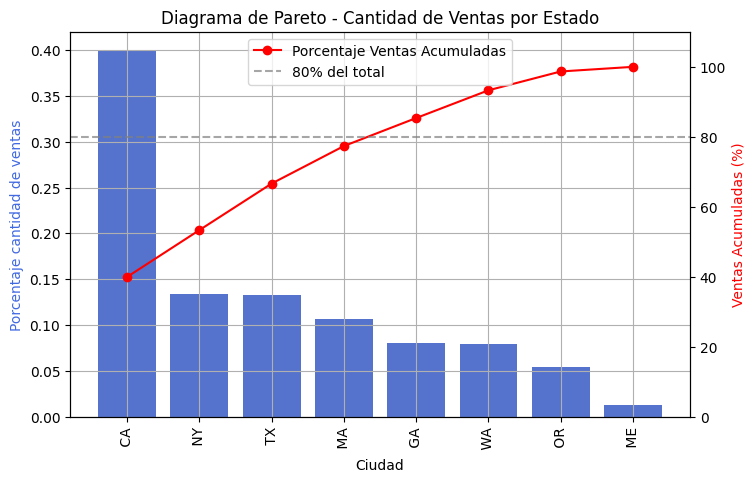

In [133]:
fig, ax1 = plt.subplots(figsize=(8,5)) # se crea una figura y el eje principal

sns.barplot(
    data= ventas_estado,
    x = "State",
    y = "Porcentaje_ventas",
    color="royalblue",
    ax = ax1        # el gráfico de barras corresponde al eje principal ax1
)
plt.xticks(rotation=90)
plt.grid()

ax2 = ax1.twinx()   # esto crea un segundo eje y llamado ax2 en el mismo gráfico, permite superponer dos gráficos 
                    # ax1 es para el gráfico de barras y ax2 es para el gráfico de linea
ax2.plot(
    ventas_estado["State"],  # eje x 
    ventas_estado["Porcentaje_ventas_acumuladas"], # eje y 
    color = "red",     # color de la linea
    marker= "o",        # cada punto se marca con un circulo
    linestyle = "-",    # linea continua 
    label = "Porcentaje Ventas Acumuladas"
)

# Etiquetas que corresponden a cada eje 
ax1.set_ylabel("Porcentaje cantidad de ventas", color="royalblue")
ax2.set_ylabel("Ventas Acumuladas (%)", color="red")
ax1.set_xlabel("Ciudad")
ax2.set_ylim(0, 110)    #ajusta el rango del eje y derecho, de 0 a 110 para que se vea mejor el ultimo valor del eje y 
ax1.set_title("Diagrama de Pareto - Cantidad de Ventas por Estado")
ax2.axhline(80, color="gray", linestyle="dashed", alpha=0.7, label="80% del total") # acá agregamos la linea que marca el 80% de acumulación 
ax2.legend(loc="upper center") #ubicacion de la leyenda 

plt.show()

- En este gráfico de pareto agrupado por estados, tenemos una vista más general de las ventas
- El 80% de las ventas son por parte del 50% de los estados, con este panorama, se puede considerar priorizar recursos para los estados con más ventas, estrategias de marketing y promociones para manener la o elevar la cantidad de ventas.
- El 20% de ventas restante, corresponde al otro 50% de estados, considerar rentabilidad en estos estados ya que con la misma cantidad de estados y probablemente misma cantidad de recursos o inversión, se está consiguiendo ventas muy bajas en comparación a los demás estados. Considerar factores como ubicación geográfica, población y su poder adquisitivo, competencia local, etc. 
- Vemos algo muy llamativo, el estado de california (CA), tiene un altisimo porcentaje de ventas de manera independiente, es muy importante reforzar los recursos, estrategias de marketing, promociones e inversiones en este estado, claro lider en ventas en el país.


## Predicciones:
- Una vez visto los gráficos anteriores, vimos gran estacionalidad en los datos. Con esto, llegué a la idea de implemetar un modelo predictivo para ver la cantidad de futuras ventas en cierto periodo de tiempo, usaré el modelo "Prophet", ya que este tolera outliers, podemos agregarle fechas especiales como podría ser navidad, y también detecta patrones estacionales automáticamente.


In [134]:
#importamos la libreria prophet
from prophet import Prophet

# agrupamos el df por fecha y le agregamos el total de ventas
df_grouped_real = df.groupby(df["Order Date"].dt.to_period("M")).size().reset_index(name="Sales") #acá se creó una serie temporal de ventas mensuales

df_grouped_real["Order Date"] = df_grouped_real["Order Date"].dt.to_timestamp() # convierte el periodo a datetime

# renombramos las columnas para el modelo
df_grouped_real = df_grouped_real.rename(columns = {"Order Date" : "ds", "Sales" : "y"})

df_grouped_real.head() # vemos el dataframe

,ds,y
0,2019-01-01,9675
1,2019-02-01,11975
2,2019-03-01,15153
3,2019-04-01,18279
4,2019-05-01,16566


In [135]:
"""Antes de crear el modelo, crearemos un datarame con fechas especiales para que el modelo las tenga en cuenta, las fechas que agregaremos son, navidad y black friday,
ya que son el mayor pico de ventas de todo el año, y el modelo debe tenerlas en cuenta para hacer predicciones más precisas.
"""
# creamos un dataframe con las fechas especiales
df_fechas_especiales = pd.DataFrame({
    "holiday": ["Navidad", "Black Friday"],
    "ds" : pd.to_datetime(["2019-12-01", "2019-11-29"]), # la fecha de navidad es el 1 de diciembre ya que las ventas de navidad empiezan a subir desde el primer día de diciembre y el black friday es el 29 de noviembre
    "lower_window":[0, 0,],  # define cuantos dias antes de la fecha especial inicia el impacto de ventas, en este caso es el mismo día
    "upper_window":[31, 0]   # define cuantos dias despues de la fecha especial termina el impacto de ventas, en este caso es 24 días despues de navidad y el mismo dia para black friday
})

df_fechas_especiales.head() # vemos el dataframe

,holiday,ds,lower_window,upper_window
0,Navidad,2019-12-01,0,31
1,Black Friday,2019-11-29,0,0


In [136]:

# creamos el modelo prophet
model = Prophet(holidays=df_fechas_especiales, weekly_seasonality=True, daily_seasonality=True) # usamos estacionalidades diarias y semanales, no usamos anuales porque solo tenemos datos de 1 año completo
# weeklky_seasonality captura la estacionalidad semanal
# daily_seasonality captura la estacionalidad diaria

model.add_seasonality(name="monthly", period= 30.5, fourier_order=1) # agregamos una estacionalidad mensual
# estacionalidad mensual, le asignamos un periodo de 30.5 días, que es el promedio de días en un mes, y un fourier_order de 2, fue el valor que mejor se adecuó al modelo. Fourier_order controla qué tan detalladamente el modelo aprende los patrones repetitivos
# Con numero alto de fourier_order el modelo puede aprender ruido, y con un número bajo puede ser muy basico y perder detalles importantes 

# ajustamos el modelo a los datos
model.fit(df_grouped_real)



16:39:55 - cmdstanpy - INFO - Chain [1] start processing
16:39:56 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
# creaos un dataframe con las fechas futuras
futuro = model.make_future_dataframe(periods=12, freq="ME")  # Esto crea un dataframe con las fechas futuras, en este caso 6 meses

#hacemos la prediccion
prediccion = model.predict(futuro)

# imprimimos la prediccíon para los proximos 12 meses
print(prediccion[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)) # yhat es la predicción(venta esperada), yhat_lower es el límite inferior(venta minima esperada) y yhat_upper es el límite superior (venta maxima esperada)



           ds          yhat    yhat_lower    yhat_upper
13 2020-01-31  20320.387200  18438.513539  22054.574878
14 2020-02-29  12966.697343  11132.253081  14613.769969
15 2020-03-31  18444.457842  16686.021106  20233.140600
16 2020-04-30  11373.179377   9550.522929  13079.862271
17 2020-05-31  13290.790833  11622.696141  15126.929151
18 2020-06-30  17503.199158  15755.764921  19217.002355
19 2020-07-31  20673.748460  19019.169079  22329.897949
20 2020-08-31  22270.571031  20580.321770  23955.415604
21 2020-09-30  22074.530536  20355.063285  23958.590802
22 2020-10-31  19815.902434  18008.649822  21472.698928
23 2020-11-30  22069.597617  20467.159759  23757.927169
24 2020-12-31  18222.384468  16598.102732  19934.152391


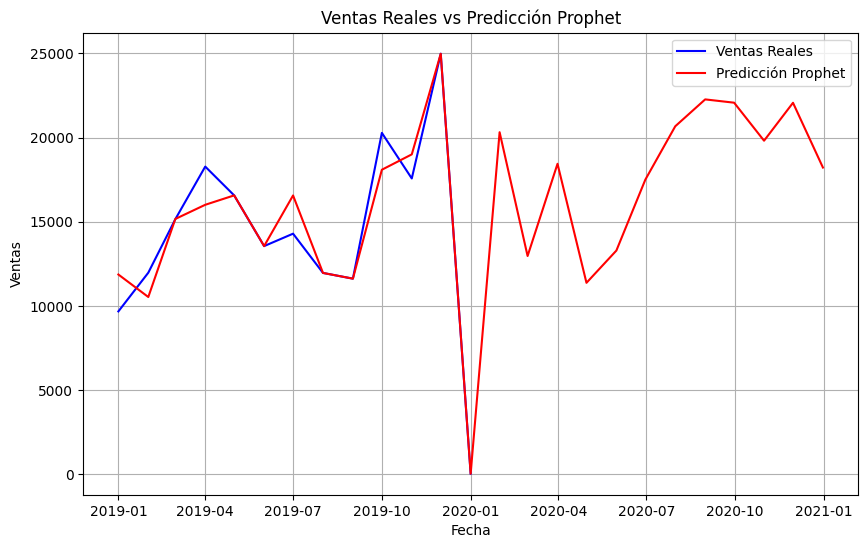

In [138]:
# graficamos las predicciones
plt.figure(figsize=(10, 6))

#datos reales (ventas)
sns.lineplot(
    x=df_grouped_real['ds'],
    y=df_grouped_real['y'],
    label='Ventas Reales',
    color='blue'
)

#  predicciones del modelo prophet
sns.lineplot(
    x=prediccion['ds'], 
    y=prediccion['yhat'],
    label='Predicción Prophet',
    color='red'
)

# titulos y etiquetas
plt.title('Ventas Reales vs Predicción Prophet')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

# Mostrar el grafico
plt.grid()
plt.show()

### Evaluación del modelo predictivo
- Evaluaremos el modelo predictivo con MAE (Error Absoluto Medio), RMSE (Raiz del error cuadratico medio) y MAPE (Errir porcentual absoluto medio), estas tres métricas en conjunto nos ayudarán a tener un analisis más completo.

In [141]:
df_evaluacion = df_grouped_real.merge(prediccion[["ds", "yhat"]], on="ds", how="left") # unimos los datos reales con las predicciones

df_evaluacion = df_evaluacion.rename(columns={"y": "Real", "yhat": "Prediccion"}) # renombramos las columnas

df_evaluacion.head() # vemos el dataframe

,ds,Real,Prediccion
0,2019-01-01,9675,11866.473270
1,2019-02-01,11975,10530.699573
2,2019-03-01,15153,15167.748878
3,2019-04-01,18279,16009.263362
4,2019-05-01,16566,16568.530954


In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_evaluacion["Real"], df_evaluacion["Prediccion"]) # calculamos el error absoluto medio

rmse = np.sqrt(mean_squared_error(df_evaluacion["Real"], df_evaluacion["Prediccion"])) # calculamos el error cuadratico medio

mape = np.mean(np.abs((df_evaluacion["Real"] - df_evaluacion["Prediccion"]) / df_evaluacion["Real"])) * 100 # calculamos el error porcentual absoluto medio

print(f"Error absoluto medio (MAE): {mae:.2f}") # Promedio el cual el modelo se equivoca en las predicciones

print(f"Error cuadratico medio (RMSE): {rmse:.2f}") # Promedio de la raiz cuadrada de los errores al cuadrado, similar al MAE pero penaliza más los errores grandes

print(f"Error porcentual absoluto medio (MAPE): {mape:.2f}%") # Promedio de los errores porcentuales, nos dice que tan lejos está el modelo de las predicciones reales en porcentaje

Error absoluto medio (MAE): 909.20
Error cuadratico medio (RMSE): 1359.95
Error porcentual absoluto medio (MAPE): 6.81%


## Conclusion del modelo predictivo: 
- Luego de varias pruebas y errores con el modelo predictivo, logré un modelo relativamente correcto. Como podemos observar, en el año 2019, que son los datos que tenemos registrados, el modelo predictivo siguió la tendencia de una manera bastante similar a la real, siguiendo las mismas subidas y caidas pero de una manera más drástica pero acertada, esto nos da la confianza para seguir el modelo. Las evaluaciones que realizamos al modelo predictivo nos arroja un mae realitvamente bajo, en promedio el modelo se quivoca en 909 ventas por mes. El RMSE penaliza más los errores grandes, es muy similar al MAE, en promedio se equivoca en 1359 ventas por mes. Por ultimo, el MAPE nos arroja un error del 6.81% del valor real de las ventas.

- Debemos tener en cuenta que no tenemos suficientes datos historicos, solamente del 2019, debido a eso, el modelo predictivo replicó la caida de ventas debido a la pandemia. Si tuvieramos datos de más años, no replicaría esa caida anormal.

- Con este modelo predictivo, y las medidas de error, podemos tener una visíon más amplia de las futuras ventas, y saber que esperar para reforzar recursos en durante el año

In [143]:
# hacer evaluación del modelo
# analisis de patrones de compras ¿Los clientes compran los mismos productos juntos? (Análisis de asociación, como reglas de Apriori).
# Segmentación de clientes: Clientes que compran con frecuencia vs. clientes esporádicos.

#Agrupación de productos: ¿Qué productos se venden juntos con frecuencia? (Análisis de asociación, como reglas de Apriori).


# investigar clustering

